# Pima Indians Diabetes Database

Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india Pima.

Los conjuntos de datos constan de varias variables predictivas médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.


### Pima Indians Diabetes Database

| Column                    | Dtype    | Descripción                                             |
|---------------------------|----------|---------------------------------------------------------|
| Pregnancies               | int64    | Number of times pregnant                                |
| Glucose                   | int64    | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure             | int64    | Diastolic blood pressure (mm Hg)                         |
| SkinThickness             | int64    | Triceps skin fold thickness (mm)                         |
| Insulin                   | int64    | 2-Hour serum insulin (mu U/ml)                           |
| BMI                       | float64  | Body mass index (weight in kg/(height in m)^2)           |
| DiabetesPedigreeFunction  | float64  | Diabetes pedigree function                              |
| Age                       | int64    | Age (years)                                             |
| Outcome                   | int64    | Class variable (0 or 1) 268 of 768 are 1, the others are 0 |


### Descarga del conjunto de datos

[Kaggle: Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)


In [91]:
# importar librerias
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import __version__ as sklearn_version

# versiones 

print(f'Pandas version: {pd.__version__}')
print(f'Altair version: {alt.__version__}')
print(f'Matplotlib version: {plt.matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Scikit-learn version: {sklearn_version}')
print(f'Scipy version: {sp.__version__}')


Pandas version: 2.0.3
Altair version: 5.1.2
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Scikit-learn version: 1.3.2
Scipy version: 1.11.3


In [4]:
# Definimos una funcion que separe las columnas de entrada (X) 
# de la columna objetivo (y)
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [5]:
# Lecutra del archivo

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# valores nulos
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# tabla de correlacion
corr = diabetes_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Graficos

Text(0.5, 1.0, 'Distribución de mujeres con y sin diabetes')

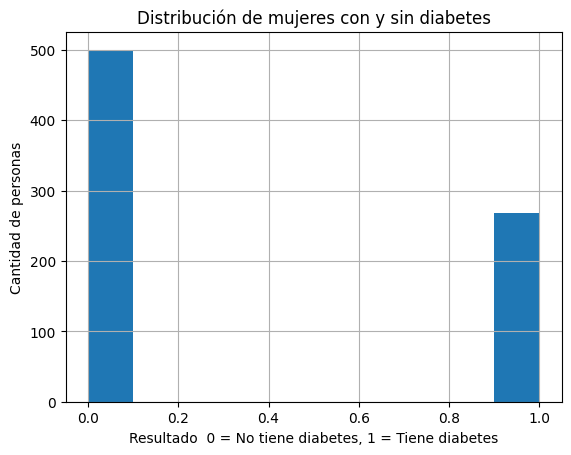

In [10]:
# histograma 

diabetes_df["Outcome"].hist()
plt.xlabel("Resultado  0 = No tiene diabetes, 1 = Tiene diabetes")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de mujeres con y sin diabetes")



In [80]:
print(f'Personas con diabetes: {diabetes_df[diabetes_df["Outcome"] == 1].shape[0]}')
print(f'Personas sin diabetes: {diabetes_df[diabetes_df["Outcome"] == 0].shape[0]}')

Personas con diabetes: 268
Personas sin diabetes: 500


El conjunto de datos exhibe un desbalanceo significativo entre las personas diagnosticadas con diabetes (1) y aquellas sin diabetes (0). De los 768 registros, 268 pertenecen al grupo de personas con diabetes, mientras que las personas sin diabetes constituyen la mayoría con 500 registros. Este desequilibrio en la distribución de clases puede influir en el rendimiento y la interpretación de los modelos de aprendizaje automático entrenados en este conjunto de datos

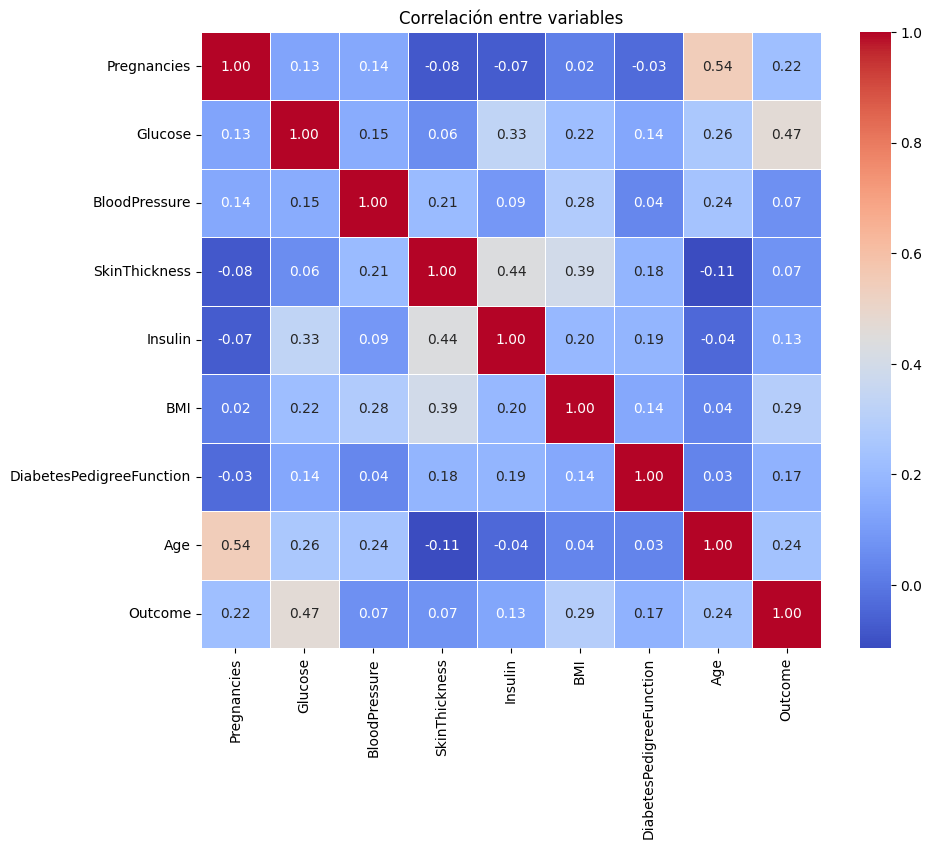

In [11]:
# mapa de calor
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, ax=ax)
plt.title("Correlación entre variables")

plt.show()


Basándonos en el mapa de calor de correlación, se observa que las variables de entrada que presentan una mayor relación positiva son la edad (Age) y los embarazos (Pregnancies), con un coeficiente de correlación de 0.54. Le siguen la insulina (Insulin) y el grosor de piel (SkinThickness) con una correlación de 0.39.

En cuanto a las relaciones negativas o inversas, se destaca la conexión entre el grosor de piel y la edad, con un coeficiente de correlación de -0.11.

En lo que respecta a las variables de entrada en relación con la variable de salida, se destaca la glucosa (Glucose) y el diagnóstico (Outcome) como las que presentan una mayor correlación, alcanzando un valor de 0.47. Esta correlación sugiere una relación significativa entre los niveles de glucosa en sangre y la presencia de diabetes en la muestra de datos. 

In [12]:
alt.Chart(diabetes_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Outcome:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
    column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
)

alt.RepeatChart(...)


Al analizar el diagrama de dispersión de múltiples paneles, se hace evidente que no es una tarea sencilla diferenciar si una persona presenta diabetes basándose en las diversas columnas de entrada, incluso en aquellas que muestran una correlación más pronunciada, ya sea proporcional o inversa. La dispersión de los puntos en los gráficos sugiere que un modelo lineal simple puede no ser suficiente para obtener resultados precisos en la predicción de la presencia de diabetes.

Ante esta observación, se ha decidido explorar enfoques más complejos para el modelado. Se han implementado modelos como Random Forest y Support Vector Machine (SVM), que son capaces de capturar relaciones no lineales y patrones más intrincados en los datos. Estos modelos, al considerar interacciones no lineales entre las variables, tienen el potencial de mejorar la capacidad predictiva en comparación con modelos lineales convencionales. Este enfoque más avanzado busca aprovechar la complejidad inherente en los datos, con la esperanza de lograr predicciones más precisas y robustas en la identificación de casos de diabetes.

In [81]:
alt.Chart(diabetes_df).mark_circle(size=60).encode(
    x='Pregnancies',
    y='Age',
    color='Outcome:N',
    tooltip=['Outcome', 'Pregnancies', 'Age']
).properties(
    title='Diagrama de dispersión de Embarazos vs Edad con Resultado de Diabetes'
)

alt.Chart(...)

In [82]:
alt.Chart(diabetes_df).mark_circle(size=60).encode(
    x='SkinThickness',
    y='Age',
    color='Outcome:N',
    tooltip=['Outcome', 'SkinThickness', 'Age']
).properties(
    title='Diagrama de dispersión de Grosor de piel vs Edad con Resultado de Diabetes'
)

alt.Chart(...)

##  Modelo

In [15]:
#división de datos usando train_test_split de sklearn
# 60% para entrenamiento, 20% para validación y 20% para pruebas
# conservar la proporción de la variable objetivo usando stratify
train_set, test_set = train_test_split(diabetes_df, test_size=0.4, random_state=42, stratify=diabetes_df['Outcome'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42, stratify=test_set['Outcome'])

In [16]:
# uso de la funcion remove_labels para separar las columnas de entrada (X) de la columna objetivo (y)
X_train, y_train = remove_labels(train_set, 'Outcome')
X_val, y_val = remove_labels(val_set, 'Outcome')
X_test, y_test = remove_labels(test_set, 'Outcome')

## Modelo RandomForests

In [17]:
clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [18]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_rnd.predict(X_val)

### F1 Score
La puntuación F1 es la media armónica de Precision y Recall.

* $F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$



In [19]:
f1_all_columns = f1_score(y_pred, y_val, average="weighted")
print("F1 score:", f1_score(y_pred, y_val, average='weighted'))

F1 score: 0.7654881004163301


Entrenando un modelo utilizando el algoritmo Random Forest se evaluo su rendimiento utilizando el conjunto de datos de predicciones (y_pred) y el conjunto de validación (y_val). La métrica F1 Score obtenida fue de 0.7655, utilizando la opción average="weighted". El F1 Score ponderado tiene en cuenta tanto la precisión como el recall, proporcionando una medida equilibrada del rendimiento del modelo en un conjunto de datos multiclase. Este resultado sugiere que el modelo ha logrado un buen equilibrio entre la precisión y la exhaustividad en la clasificación, siendo 1 el mejor valor posible para el F1 Score.

### Importancia de las caracteristicas de entrada

In [20]:
clf_rnd.feature_importances_

array([0.09428864, 0.27456664, 0.08774876, 0.07071144, 0.0679401 ,
       0.15610986, 0.11731529, 0.13131927])

In [21]:
# Creamos un diccionario con las columnas y los puntajes de importancia
feature_importances = {name: score for name, score in zip(list(diabetes_df), clf_rnd.feature_importances_)}

In [22]:
# Ordenamos el diccionario (como una serie) por los puntajes de importancia
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted

Glucose                     0.274567
BMI                         0.156110
Age                         0.131319
DiabetesPedigreeFunction    0.117315
Pregnancies                 0.094289
BloodPressure               0.087749
SkinThickness               0.070711
Insulin                     0.067940
dtype: float64

Vamos a tomar las entradas Glucose, BMI, Age, DiabetesPedigreeFunction y hacer un modelo usando RandomForest con las caracteristicas reducidas

In [23]:
# reducción de dimensionalidad
columns = list(feature_importances_sorted.head(4).index)
columns

['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

In [24]:
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()
X_test_reduced = X_test[columns].copy()

In [25]:
# Entrenamos un modelo con las columnas reducidas
clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [26]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_rnd.predict(X_val_reduced)

In [27]:
f1_reduced_columns = f1_score(y_pred, y_val, average="weighted")
f1_diference = f1_all_columns - f1_reduced_columns
print("F1 score con todas las caracteristicas:", f1_all_columns)
print("F1 score caracteristicas reducidas:", f1_reduced_columns)
print("Diferencia:", f"{f1_diference * 100:.2f} %")


F1 score con todas las caracteristicas: 0.7654881004163301
F1 score caracteristicas reducidas: 0.7697048810698154
Diferencia: -0.42 %


Al emplear un conjunto reducido de columnas de entrada, específicamente las características Glucose, BMI, Age y DiabetesPedigreeFunction, se ha evaluado el rendimiento de un modelo, obteniendo un F1 Score de 0.7697. Comparativamente, utilizando todas las características originales se obtuvo un F1 Score ligeramente inferior de 0.7655. La diferencia entre ambos puntajes es del -0.42%, indicando que el modelo con características reducidas supera marginalmente al modelo con todas las características.

### Modelo SVM (SUPPORT VECTOR MACHINE)

In [28]:
# Prediccion usando SVM con Kernel Gaussiano (rbf) con las carecteristicas reducidas
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=1, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train_reduced, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('svm_clf', SVC(C=1000, gamma=1))])

In [29]:
y_pred = rbf_kernel_svm_clf.predict(X_val_reduced)
print("F1 Score SVM GAUSSIANO con caracteristicas reducidas:", f1_score(y_pred, y_val, average="weighted"))

F1 Score SVM GAUSSIANO con caracteristicas reducidas: 0.7402597402597404


In [30]:
# Prediccion usando SVM con Kernel Gaussiano (rbf) con todas las caracteristicas
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=10, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('svm_clf', SVC(C=1000, gamma=10))])

In [31]:
y_pred = rbf_kernel_svm_clf.predict(X_val)
print("F1 Score SVM GAUSSIANO con todas las caracteristicas:", f1_score(y_pred, y_val, average='weighted'))

F1 Score SVM GAUSSIANO con todas las caracteristicas: 0.7856167547867153


Como se observa el modelo SVM con  todas las caracteristicas muestra una mejor prediccion que modelos anteriores, con una clasificacion satisfactoria del 78.56 % de los datos. Este modelo puede mejorar si aplicamos una busqueda de hiperparametros (gamma y C) con GridSearchCV, RandomizedSearchCV u otra tecnica.

#### Busqueda de hiperparametros para SVM (Support Vector Machine)

In [32]:
# randomize search para buscar los mejores hiperparametros
param_distributions = [
    # primer modelo usando svm con kernel gaussiano
    {
        "kernel": ["rbf"],
        "gamma": sp.stats.expon(scale=0.1),
        "C": sp.stats.expon(scale=100),
    },
    # segundo usando kernel polinomial
    {
        "kernel": ["poly"],
        "coef0": sp.stats.expon(scale=1),
        "degree": [2, 3, 4, 5],
        "C": sp.stats.expon(scale=100),


    }
]
    
    

In [33]:
# uso randomizedsearchcv
svm_random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring="f1_weighted",
    refit=True,
    random_state=42,
)

In [34]:
# busqueda de hiperparametros con la totalidad de las caracteristicas
svm_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213D6850>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002282129D710>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213BB890>,
                                         'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213D6990>,
                                         'degree': [2, 3, 4, 5],
                                         'kernel': ['poly']}],
                   random_state=42, scoring='f1_weighted')

In [35]:
svm_random_search.cv_results_

{'mean_fit_time': array([0.00904408, 0.2180624 , 0.01069112, 0.00691504, 0.40635085,
        0.71136746, 0.00890503, 0.0053031 , 0.13356318, 0.18061247,
        0.00887594, 0.00639472, 0.0099998 , 0.00640011, 0.01270933,
        0.14532304, 0.2441802 , 0.14601102, 0.63191085, 2.89560509,
        0.08171401, 0.00750833, 0.00984726, 0.19603615, 0.01334014,
        0.11126003, 0.00950675, 0.00552878, 0.00960879, 0.00790286,
        0.0135222 , 0.00787144, 0.00570312, 1.02536807, 0.00540361,
        0.0054996 , 0.00930529, 0.00870643, 0.07094884, 0.00980663,
        0.0062047 , 0.02301183, 0.23827577, 0.7030417 , 0.01948104,
        0.00570316, 0.00926342, 0.02301307, 0.00692763, 0.00870571]),
 'std_fit_time': array([1.57335578e-03, 1.05061807e-01, 8.64865220e-04, 1.61553377e-03,
        1.92585806e-01, 2.04756851e-01, 1.98322637e-03, 4.02326231e-04,
        6.15670588e-02, 5.40910546e-02, 6.60652309e-04, 6.59688941e-04,
        1.29186794e-06, 4.88424560e-04, 2.56054284e-03, 2.90166490e-0

In [36]:
svm_random_search.best_estimator_

SVC(C=21.813469463126744, coef0=0.046281965686831954, degree=5, kernel='poly')

In [37]:
svm_random_search.best_score_

0.7624598730133264

In [38]:
svm_random_search.best_params_

{'C': 21.813469463126744,
 'coef0': 0.046281965686831954,
 'degree': 5,
 'kernel': 'poly'}

En la búsqueda de hiperparámetros para los modelos SVM polinomial y RBF, se ha determinado que el modelo polinomial ofrece los mejores resultados. Los parámetros óptimos para el modelo polinomial son {'C': 21.813469463126744, 'coef0': 0.046281965686831954, 'degree': 5, 'kernel': 'poly'}. Estos parámetros han sido seleccionados con el objetivo de maximizar el rendimiento del modelo en términos de F1 Score.

A continuación, se procederá a evaluar el modelo utilizando F1 Score en los conjuntos de validación y prueba (val, test). Este paso proporcionará una medida más precisa del rendimiento del modelo en datos no vistos, permitiendo validar su capacidad de generalización.

In [39]:
y_pred_poly_val = svm_random_search.predict(X_val)
f1_score_poly_val = f1_score(y_pred_poly_val, y_val, average="weighted")
print("F1 Score Randomized SVM polinomico:", f1_score_poly_val)

F1 Score Randomized SVM polinomico: 0.7796897000493033


In [40]:
y_pred_poly_test = svm_random_search.predict(X_test)
f1_score_poly_test = f1_score(y_pred_poly_test, y_test, average="weighted")
print("F1 Score Randomized SVM polinomico :", f1_score_poly_test)

F1 Score Randomized SVM polinomico : 0.7225763969950015


In [41]:
# efectuamos con el conjunto de caracteristicas reducidas
svm_random_search.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213D6850>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002282129D710>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213BB890>,
                                         'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000228213D6990>,
                                         'degree': [2, 3, 4, 5],
                                         'kernel': ['poly']}],
                   random_state=42, scoring='f1_weighted')

In [42]:
svm_random_search.best_estimator_

SVC(C=97.91081965694842, coef0=0.3504567255332862, degree=2, kernel='poly')

In [43]:
svm_random_search.best_score_

0.7778501939578257

In [44]:
y_pred_poly_reduced_val = svm_random_search.predict(X_val_reduced)
f1_score_poly_reduced_val = f1_score(y_pred_poly_reduced_val, y_val,
                                     average="weighted")
print("F1 Score Randomized SVM polinomico reducido:", f1_score_poly_reduced_val)

F1 Score Randomized SVM polinomico reducido: 0.7799594900512331


In [45]:
y_pred_poly_reduced_test = svm_random_search.predict(X_test_reduced)
f1_score_poly_reduced_test = f1_score(y_pred_poly_reduced_test, y_test,
                                      average="weighted")
print("F1 Score Randomized SVM polinomico reducido:", f1_score_poly_reduced_test)

F1 Score Randomized SVM polinomico reducido: 0.7683884297520662


Al aplicar una búsqueda de hiperparámetros para SVM, tanto en características reducidas como completas, el F1 Score se mantiene igual o superior al 78%. Sin embargo, al evaluar el modelo con un conjunto de datos no visto anteriormente (test), el F1 Score disminuye en menos de un 2%. Pasamos de un F1 Score del 78% en el conjunto de validación (val) a un 76.84% en el conjunto de prueba (test), en el caso de características completas. En el caso de SVM con características reducidas, se observa una reducción del F1 Score, disminuyendo del 78.1% al 72.26% con el conjunto de prueba (test). Se concluye que el modelo SVM polinómico con características reducidas demuestra una mejor capacidad de clasificación, determinando la presencia o ausencia de diabetes en función de las características de entrada.

#### Busqueda de hiperparametros para Random Forest

In [46]:
# randomize search para buscar los mejores hiperparametros para random forest

param_distributions_random_forest = [
    {
        "n_estimators": [10, 50, 100, 200, 500],
        "max_depth": [2, 5, 10, 20, 50],
        "max_features": [2, 3, 4],
        
    }
]

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_random_search = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = param_distributions_random_forest,
    cv = 5,
    scoring="f1_weighted",
    verbose=2,
    n_jobs = -1)

In [49]:
rf_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'max_depth': [2, 5, 10, 20, 50],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [10, 50, 100, 200,
                                                          500]}],
                   scoring='f1_weighted', verbose=2)

In [50]:
rf_random_search.best_params_

{'n_estimators': 200, 'max_features': 2, 'max_depth': 10}

In [51]:
rf_random_search.best_score_

0.7906983482530365

In [52]:
rf_random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=2, n_estimators=200)

In [53]:
y_pred_rf_val = rf_random_search.predict(X_val)
f1_score_rf_val = f1_score(y_pred_rf_val, y_val, average="weighted")
print("F1 Score Random Forest:", f1_score_rf_val)

F1 Score Random Forest: 0.7640037295655032


In [54]:
y_pred_rf_test = rf_random_search.predict(X_test)
f1_score_rf_test = f1_score(y_pred_rf_test, y_test, average="weighted")
print("F1 Score Random Forest:", f1_score_rf_test)

F1 Score Random Forest: 0.7042555768997804


In [55]:
# efectuamos con el conjunto de caracteristicas reducidas
rf_random_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'max_depth': [2, 5, 10, 20, 50],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [10, 50, 100, 200,
                                                          500]}],
                   scoring='f1_weighted', verbose=2)

In [56]:
rf_random_search.best_params_

{'n_estimators': 200, 'max_features': 3, 'max_depth': 5}

In [57]:
rf_random_search.best_score_

0.7816916320816908

In [58]:
y_pred_rf_reduced_val = rf_random_search.predict(X_val_reduced)
f1_score_rf_reduced_val = f1_score(y_pred_rf_reduced_val, y_val,
                                   average="weighted")
print("F1 Score Randomized SVM polinomico reducido:", f1_score_rf_reduced_val)

F1 Score Randomized SVM polinomico reducido: 0.7498116375691559


In [59]:
y_pred_rf_reduced_test = rf_random_search.predict(X_test_reduced)
f1_score_rf_reduced_test = f1_score(y_pred_rf_reduced_test, y_test,
                                    average="weighted")
print("F1 Score Randomized SVM polinomico reducido:", f1_score_rf_reduced_test)

F1 Score Randomized SVM polinomico reducido: 0.729972483256321


In [60]:
# f1 score de los modelos
print("F1 Score Random Forest val:                 ", f"{f1_score_rf_val:.2f} %")
print("F1 Score Random Forest test:                ", f"{f1_score_rf_test:.2f} %")
print("F1 Score Random Forest reducido val:        ", f"{f1_score_rf_reduced_val:.2f} %")
print("F1 Score Random Forest reducido test:       ", f"{f1_score_rf_reduced_test:.2f} %")
print("F1 Score Randomized SVM polinomico val:     ", f"{f1_score_poly_val:.2f} %")
print("F1 Score Randomized SVM polinomico test:    ", f"{f1_score_poly_test:.2f} %")
print("F1 Score Randomized SVM polinomico reducido:", f"{f1_score_poly_reduced_val:.2f} %")
print("F1 Score Randomized SVM polinomico reducido:", f"{f1_score_poly_reduced_test:.2f} %")



F1 Score Random Forest val:                  0.76 %
F1 Score Random Forest test:                 0.70 %
F1 Score Random Forest reducido val:         0.75 %
F1 Score Random Forest reducido test:        0.73 %
F1 Score Randomized SVM polinomico val:      0.78 %
F1 Score Randomized SVM polinomico test:     0.72 %
F1 Score Randomized SVM polinomico reducido: 0.78 %
F1 Score Randomized SVM polinomico reducido: 0.77 %


Con base en los resultados obtenidos, se tomará el modelo SVM con características reducidas para su implementación. Las métricas de F1 Score muestran que este modelo presenta un desempeño favorable tanto en los conjuntos de validación como en los conjuntos de prueba. A continuación, se detallan los F1 Scores correspondientes a distintos escenarios:

Random Forest:

* F1 Score Random Forest (val): 0.76%
* F1 Score Random Forest (test): 0.70%
* F1 Score Random Forest reducido (val): 0.75%
* F1 Score Random Forest reducido (test): 0.73%

Randomized SVM Polinómico:

* F1 Score Randomized SVM Polinómico (val): 0.78%
* F1 Score Randomized SVM Polinómico (test): 0.72%
* F1 Score Randomized SVM Polinómico reducido (val): 0.78%
* F1 Score Randomized SVM Polinómico reducido (test): 0.77%

La elección del modelo SVM con características reducidas se sustenta en su consistencia y buen rendimiento en ambas etapas de evaluación, tanto en los conjuntos de validación como en los conjuntos de prueba. Este enfoque se selecciona con la intención de lograr una generalización efectiva del modelo en entornos no vistos, ofreciendo un equilibrio entre rendimiento y simplicidad.

In [61]:
confusion_matrix(y_test, y_pred_poly_reduced_test)

array([[91, 10],
       [28, 25]], dtype=int64)

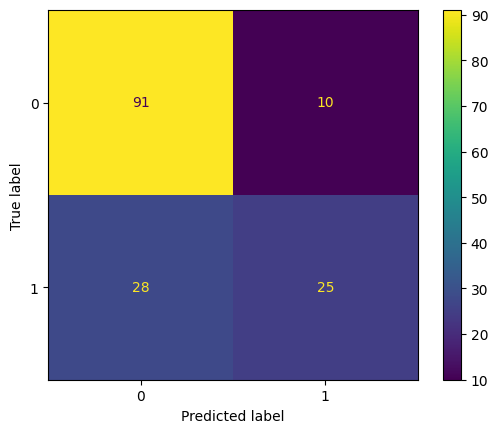

In [62]:
# matriz de confusion
cm = ConfusionMatrixDisplay.from_estimator(svm_random_search, X_test_reduced, y_test)

#### Metricas


### Accuracy (Exactitud)
Accuracy mide la proporción de instancias correctamente clasificadas sobre el total de instancias.

* $Accuracy = \frac{True Positives+True Negatives}{Total Instances}$ 

In [63]:
# excatitud 
accuracy_score(y_test, y_pred_poly_reduced_test)

0.7532467532467533

### Precision (Valor Predictivo Positivo)
Precision mide la proporción de instancias positivas predichas correctamente entre todas las instancias positivas predichas.

* $Precision = \frac{True Positives}{True Positives + False Positives}$ 

In [64]:
# precision 
precision_score(y_test, y_pred_poly_reduced_test)

0.7142857142857143

### Recall (Sensibilidad o Tasa de Verdaderos Positivos)
Recall mide la proporción de instancias positivas que se capturan correctamente.

* $Recall= \frac{True Positives}{True Positives + False Negatives}$

In [65]:
# exhaustividad 
recall_score(y_test, y_pred_poly_reduced_test)

0.4716981132075472


Basándonos en la matriz de confusión del modelo, se ha observado que la exhaustividad, también conocida como recall o sensibilidad, es de aproximadamente 47.17%. Esto significa que el modelo actual solo identifica correctamente el 47.17% de los casos positivos de diabetes, dejando una proporción considerable de casos sin detectar.

Específicamente, de los 53 casos reales positivos (1), el modelo predice incorrectamente 28 de ellos como negativos (0), mientras que solo acierta en 25 casos positivos. Dada la relevancia de identificar correctamente los casos de diabetes, se considera necesario mejorar el modelo. La precisión del modelo, que es del 71.43%, indica que de los casos positivos predichos, el 71.43% son realmente positivos. Sin embargo, dado que la exhaustividad es relativamente baja, se buscará un equilibrio para mejorar tanto la precisión como la exhaustividad en futuras iteraciones del modelo. Estas mejoras se dirigirán a fortalecer la capacidad del modelo para identificar y clasificar correctamente los casos de diabetes.

#### Busqueda de hiperparametros buscando mejorar el recall (exhaustividad ) con SVM polinomico con las caracteristicas de entrada reducidas

In [66]:
param_distributions_recall = {
    'kernel': ['poly'],
    'C': sp.stats.expon(scale=100),
    "degree": [2, 3, 4, 5],
    "coef0": sp.stats.expon(scale=1),
    'class_weight': ['balanced'],
    
}


In [67]:
svm_random_search_recall = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_distributions_recall,
    n_iter=50,
    cv=5,
    scoring="recall",
    refit=True,
    random_state=42,
)

In [68]:
svm_random_search_recall.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002282128B010>,
                                        'class_weight': ['balanced'],
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002282140AF90>,
                                        'degree': [2, 3, 4, 5],
                                        'kernel': ['poly']},
                   random_state=42, scoring='recall')

In [69]:
svm_random_search_recall.best_estimator_

SVC(C=260.7764399984743, class_weight='balanced', coef0=1.052904084582266,
    degree=5, kernel='poly')

In [70]:
svm_random_search_recall.best_score_

0.7323863636363637

In [71]:
y_pred_svm_recall_val_reduced = svm_random_search_recall.predict(X_val_reduced)
f1_score_svm_recall_reduced_val = f1_score(y_pred_svm_recall_val_reduced, y_val,
                                     average="weighted")
print("F1 Score Randomized SVM polinomico reducido val:", f1_score_svm_recall_reduced_val)

F1 Score Randomized SVM polinomico reducido val: 0.747823604966462


In [72]:
y_pred_svm_recall_test_reduced = svm_random_search_recall.predict(X_test_reduced)
f1_score_poly_reduced_test = f1_score(y_pred_svm_recall_test_reduced, y_test,
                                      average="weighted")
print("F1 Score Randomized SVM polinomico reducido test:", f1_score_poly_reduced_test)

F1 Score Randomized SVM polinomico reducido test: 0.7143125387027827


In [73]:
confusion_matrix(y_test, y_pred_svm_recall_test_reduced)

array([[71, 30],
       [13, 40]], dtype=int64)

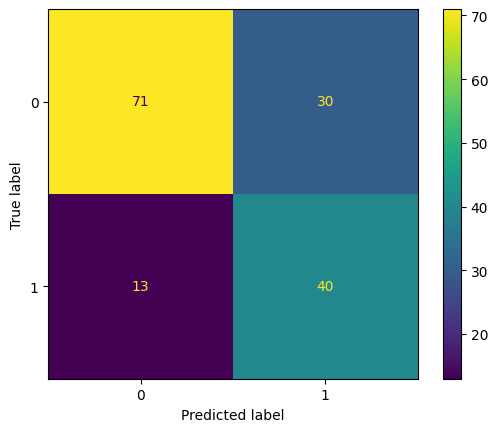

In [74]:
# matriz de confusion
cm_recall = ConfusionMatrixDisplay.from_estimator(
    svm_random_search_recall, X_test_reduced, y_test)

In [75]:
# exhaustividad 
recall_score(y_test, y_pred_svm_recall_test_reduced)

0.7547169811320755

In [76]:
# precision
precision_score(y_test, y_pred_svm_recall_test_reduced)

0.5714285714285714

In [77]:
# exactitud
accuracy_score(y_test, y_pred_svm_recall_test_reduced)


0.7207792207792207


Tras realizar una búsqueda de hiperparámetros con el objetivo de mejorar el recall, se ha observado una mejora significativa en la matriz de confusión utilizando el conjunto de datos de prueba reducido.

Estos valores indican que el modelo ha mejorado en la identificación de casos positivos. En particular, el recall, que ahora es del 75.47%, señala que el modelo es capaz de capturar el 75.47% de todos los casos positivos de diabetes en el conjunto de prueba.

Adicionalmente, la precisión ha cambiado y ahora se sitúa en 57.14%, indicando que el 57.14% de los casos predichos como positivos son realmente positivos. La exactitud (accuracy) del modelo es del 72.08%, lo que representa la proporción de casos correctamente clasificados en el conjunto de prueba.

Estos resultados sugieren que la optimización del modelo ha logrado un mejor equilibrio entre la capacidad de identificar casos positivos y la precisión general del modelo. Este enfoque está alineado con el objetivo de mejorar la capacidad de detección de casos de diabetes, priorizando el recall sin sacrificar significativamente la precisión.

# Conclusiones

1. *Optimización del Recall:* La búsqueda de hiperparámetros se centró en mejorar el recall, logrando un incremento significativo en la identificación de casos positivos de diabetes.

2. *Mejora de la Matriz de Confusión:* El mejor modelo SVM polinómico con características reducidas presenta una matriz de confusión mejorada en el conjunto de prueba, reflejando una mayor capacidad para capturar casos positivos.

3. *Balance entre Precisión y Recall:* Se ha logrado un equilibrio efectivo entre la precisión y el recall, priorizando la identificación precisa de casos de diabetes (recall) sin comprometer significativamente la precisión general del modelo.

4. *Selección del Modelo Óptimo:* El modelo SVM polinómico con características reducidas, utilizando los siguientes hiperparámetros:

* C=260.7764399984743
* class_weight='balanced'
* coef0=1.052904084582266
* degree=5
* kernel='poly'

    ha demostrado ser el más efectivo para la tarea de clasificación de casos de diabetes.

5. *Mejora en la Identificación de Casos Positivos:* La combinación de ajuste de hiperparámetros y reducción de características ha llevado a un modelo que destaca en la identificación de casos de diabetes, mejorando significativamente el recall y proporcionando resultados más precisos.

6. *Importancia de la Estratificación y Ponderación de Clases:* La estratificación durante la división de datos y la ponderación de clases han sido prácticas cruciales para abordar el desbalance en la distribución de clases, contribuyendo al rendimiento mejorado del modelo.

En resumen, la mejora del modelo SVM polinómico con características de entrada reducidas, enfocada en aumentar el recall, destaca la importancia de la detección temprana de casos de diabetes. Esta priorización no solo permite prevenir y gestionar eficazmente la enfermedad en aquellos que realmente la padecen, sino que también contribuye a una concientización más amplia sobre la salud en general. Es crucial recordar que, en este contexto, es preferible errar en prevenir algunos casos que dejar sin identificar situaciones de riesgo. La salud y el bienestar de las personas son factores fundamentales en la lucha contra la diabetes, y la implementación de modelos predictivos efectivos desempeña un papel esencial en este esfuerzo.